         P1        P2
0 -0.481788 -0.692991
1 -0.537375  0.527807
2  0.320760  0.265227
3 -0.562994 -0.503868
4  0.320512 -0.254466
[0.29255562 0.18306542]


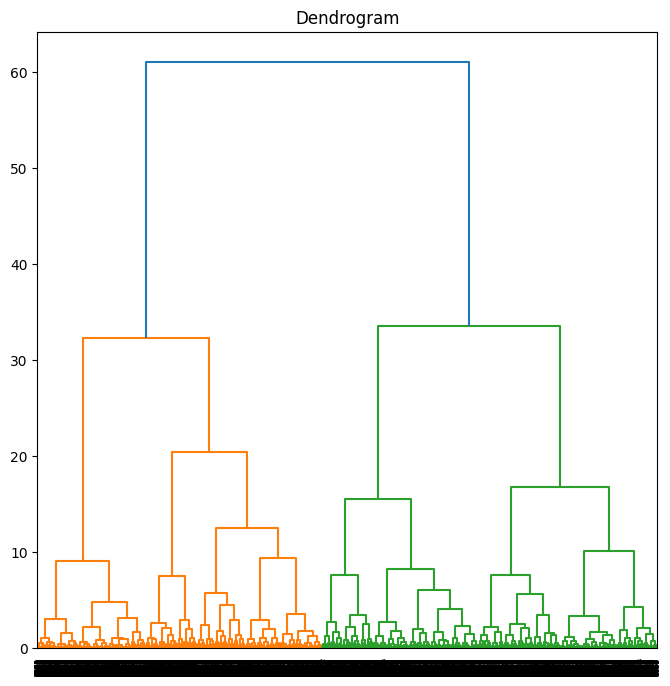

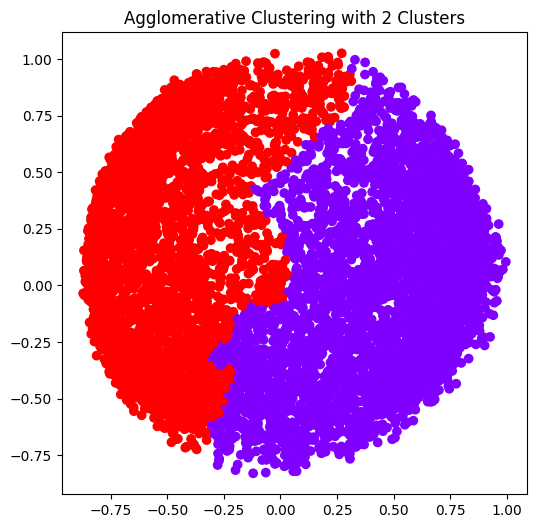

Silhouette Score for 2 clusters: 0.4232140404633143


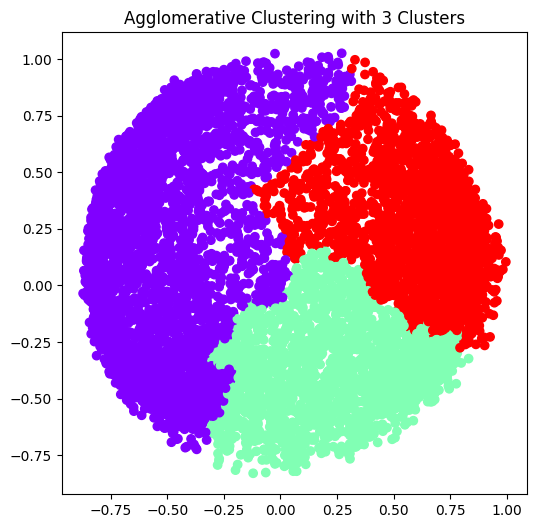

Silhouette Score for 3 clusters: 0.3648193028589937


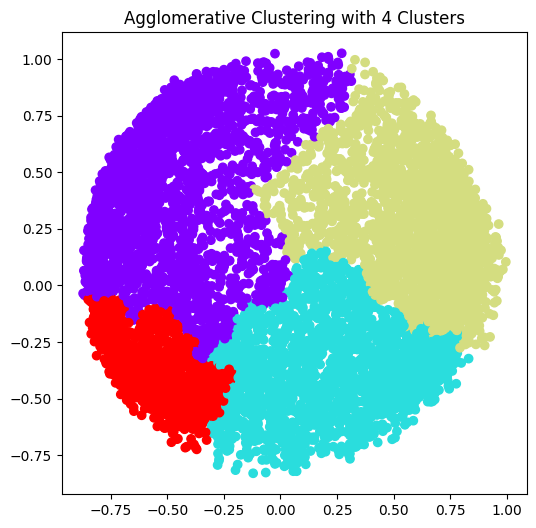

Silhouette Score for 4 clusters: 0.3557687693853273


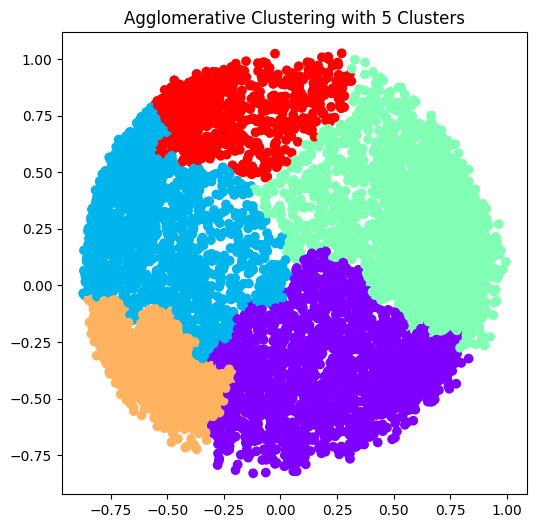

Silhouette Score for 5 clusters: 0.34504221961392684


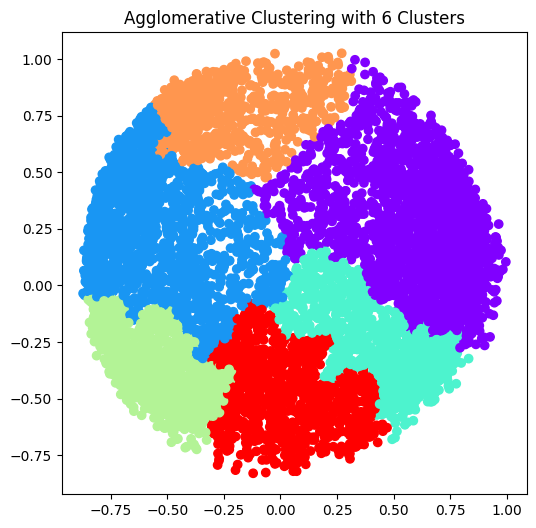

Silhouette Score for 6 clusters: 0.3132837737138623


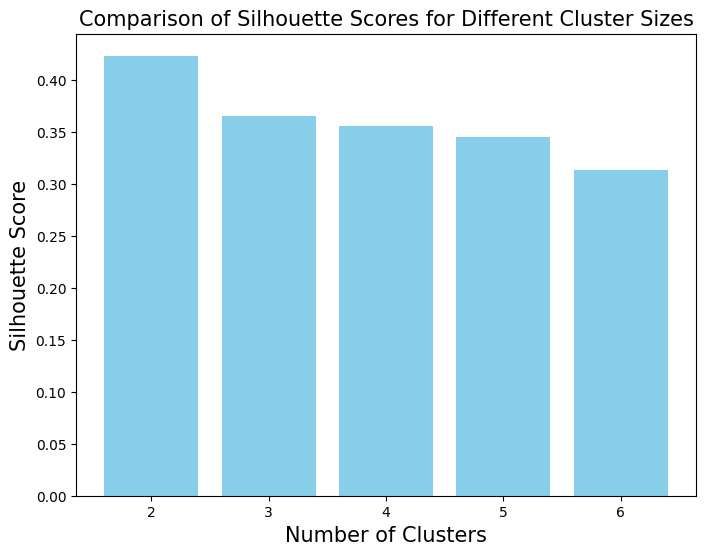


Silhouette Scores for Different Cluster Sizes:
2 clusters: 0.4232140404633143
3 clusters: 0.3648193028589937
4 clusters: 0.3557687693853273
5 clusters: 0.34504221961392684
6 clusters: 0.3132837737138623


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# Load dataset
df = pd.read_csv('CC GENERAL.csv')
df.head()

# Drop 'CUST_ID' column
df = df.drop('CUST_ID', axis=1)

# Display data info and handle missing values
df.describe()
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

# Scale and normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_normalized = normalize(df_scaled)
df_normalized = pd.DataFrame(df_normalized)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal, columns=['P1', 'P2'])
print(df_principal.head())
print(pca.explained_variance_ratio_)

# Dendrogram visualization
plt.figure(figsize=(8, 8))
plt.title('Dendrogram')
dendrogram = shc.dendrogram(shc.linkage(df_principal.values, method='ward'))
plt.show()

# Agglomerative Clustering with silhouette score evaluation
k_values = [2, 3, 4, 5, 6]
silhouette_scores = []

for k in k_values:
    ac = AgglomerativeClustering(n_clusters=k)
    cluster_labels = ac.fit_predict(df_principal)
    
    # Clustering result visualization
    plt.figure(figsize=(6, 6))
    plt.scatter(df_principal['P1'], df_principal['P2'], c=cluster_labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering with {k} Clusters')
    plt.show()

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_principal, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Silhouette score comparison
plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Silhouette Score', fontsize=15)
plt.title('Comparison of Silhouette Scores for Different Cluster Sizes', fontsize=15)
plt.show()

# Display silhouette scores
print("\nSilhouette Scores for Different Cluster Sizes:")
for i, k in enumerate(k_values):
    print(f"{k} clusters: {silhouette_scores[i]}")


In [ ]:
Here’s a breakdown of what this code does:

1. **Import Libraries**: Necessary libraries are imported to handle data, perform clustering, and visualize results.

2. **Load Dataset**: The dataset `CC GENERAL.csv` is loaded, and the first few rows are displayed to understand the data's structure.

3. **Data Preprocessing**:
   - **Drop Columns**: The `CUST_ID` column is removed as it's not needed for clustering.
   - **Handle Missing Values**: Any rows with missing values are dropped.
   - **Standardize Data**: The data is scaled using `StandardScaler`.
   - **Normalize Data**: The scaled data is normalized to ensure that each feature contributes equally to the distance measure in clustering.

4. **PCA for Dimensionality Reduction**:
   - PCA reduces the dataset to two dimensions (`P1`, `P2`) for easier visualization.
   - The explained variance ratio is printed to see how much variance is captured by these two principal components.

5. **Dendrogram Visualization**:
   - A dendrogram is plotted using hierarchical clustering (`ward` method) to visualize potential clustering structures.

6. **Agglomerative Clustering and Silhouette Scores**:
   - Clustering is performed for different values of clusters (`k` from 2 to 6).
   - Each clustering result is visualized in a scatter plot, and the silhouette score is calculated and printed.
   - Silhouette scores provide a measure of how well-separated the clusters are.

7. **Silhouette Score Comparison**:
   - Silhouette scores are displayed as a bar chart to help select the optimal number of clusters.

8. **Final Output of Silhouette Scores**:
   - All silhouette scores are printed to provide a summary.

This code is helpful for analyzing clusters within a customer dataset and for selecting the best cluster number based on silhouette scores. 

Is there anything specific you’d like to discuss or modify in this code?